In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

hman=pd.read_csv("haberman.csv")

# OUR OBJECTIVE OF THIS STUDY IS TO PREDICT IF THE PERSON CAN SURVIVE BASED ON DATA(AGE, NO OF POSITIVE AXILLARY,
YEAR OF OPERATION) WE ARE GIVEN.

In [ ]:
print(hman.shape)
print(hman.columns)
cou=hman["status"].value_counts()
cou

(306, 4)
Index(['age', 'year of operation', 'positive axillary', 'status'], dtype='object')


1    225
2     81
Name: status, dtype: int64

# BIVARIATE ANALYSIS

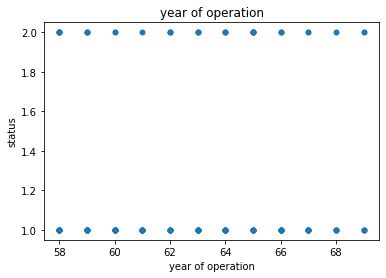

In [ ]:
hman.plot(kind="scatter",x="year of operation",y="status");
plt.title("year of operation")
plt.show()

lookong at above plot all the points almost overlap so we cannot decide anything.

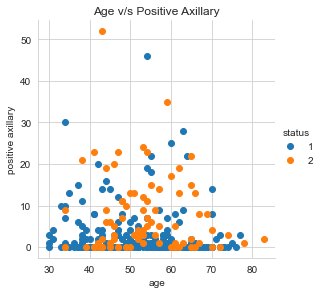

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(hman,hue="status",height=4).map(plt.scatter,"age","positive axillary").add_legend();
plt.title("Age v/s Positive Axillary")
plt.show()

looking at above plot we can say that almost 80% points are overlapped
one conclusion we can draw here is that people less than 34 years have 100% survival rate
but as there are not many cases of years less than equal to 34 we cannot rely much on that

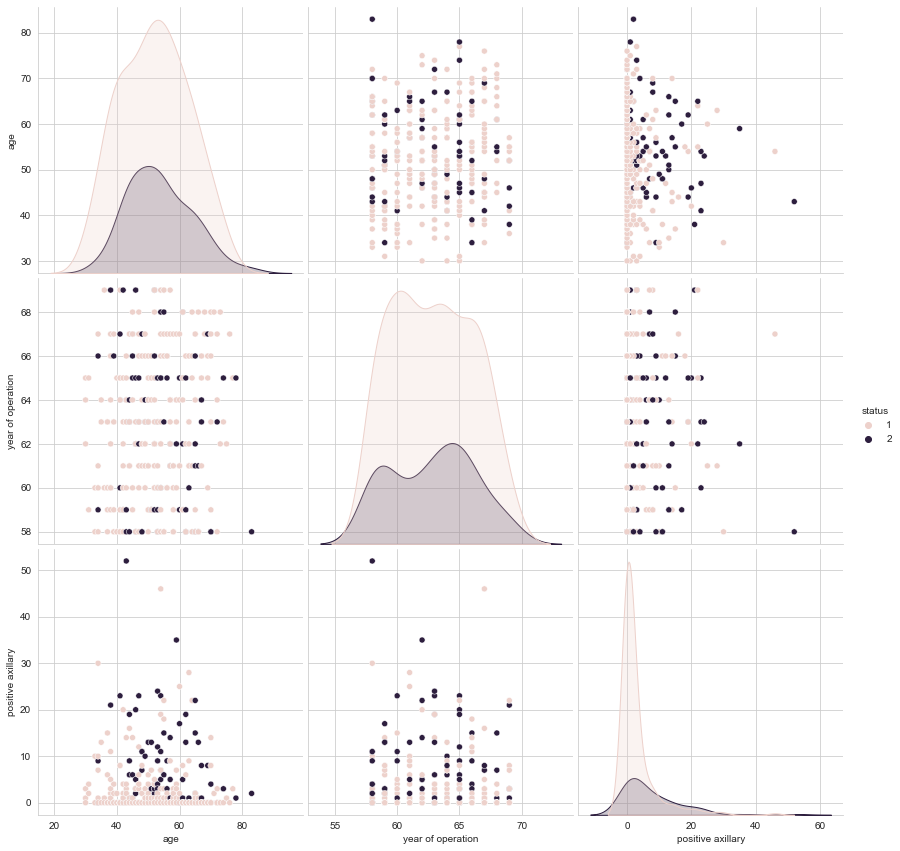

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(hman,hue="status",height=4);
plt.show()

no pairplot can be used to determine anything as all the points are heavily overlapped.
still we can draw some small conclusions out of them
people less than 34 years have survival rate of 100%
people with 0 positive arxillary have survival rate of almost 90%
people with edge less than 4o years have more than 80% chances of survival
people with more than 17 positive axillary have high chances of dying.


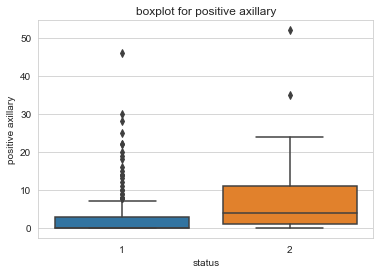

In [ ]:
sns.boxplot(x='status',y='positive axillary', data=hman)
plt.title("boxplot for positive axillary")
plt.show()

from above box plot it can be seen that about 75% people survived have positive axillary less trhan equal to 3
also 50% of people who died have positive axillary greater than 5
so above plot is quite helpful

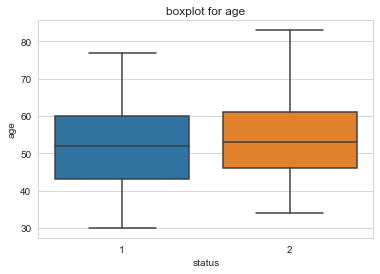

In [ ]:
sns.boxplot(x='status',y='age', data=hman)
plt.title("boxplot for age")
plt.show()

here its hard to determine anything because both the boxes are at same levels and have almost equal median

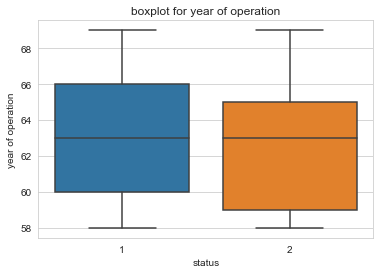

In [ ]:
sns.boxplot(x='status',y='year of operation', data=hman)
plt.title("boxplot for year of operation")
plt.show()

this plot is also not very useful

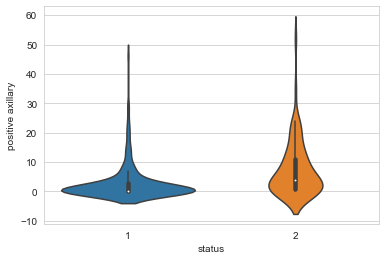

In [ ]:
sns.violinplot(x="status", y="positive axillary", data=hman, size=8)
plt.show()

looks like 50% of the people survived have positive axillary equal to 0

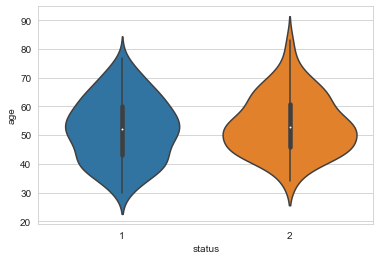

In [ ]:
sns.violinplot(x="status", y="age", data=hman, size=8)
plt.show()

no insights can be drawn as almost equal interquartile range

# UNIVARIATE ANALYSIS

C:\Users\kshit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kshit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


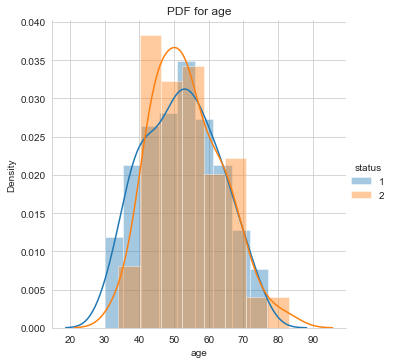

In [ ]:
sns.FacetGrid(hman,hue="status",height=5).map(sns.distplot,"age").add_legend();
plt.title("PDF for age")
plt.show()

from above plot it can be seen than people with age less than 34 have 0% death rate
also people with age greater than 75 years have 0% survival rate

C:\Users\kshit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kshit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


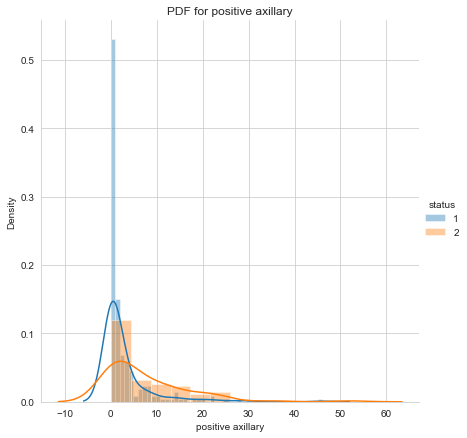

In [ ]:
sns.FacetGrid(hman,hue="status",height=6).map(sns.distplot,"positive axillary").add_legend();
plt.title("PDF for positive axillary")
plt.show()

people with 0 positive axillaries have higher chance of surviving

C:\Users\kshit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kshit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


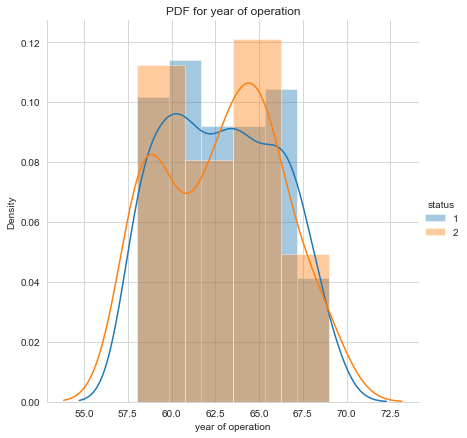

In [ ]:
sns.FacetGrid(hman,hue="status",height=6).map(sns.distplot,"year of operation").add_legend();
plt.title("PDF for year of operation")
plt.show()

above plot is totally overlapped and we cannot make any conclusions out of it

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


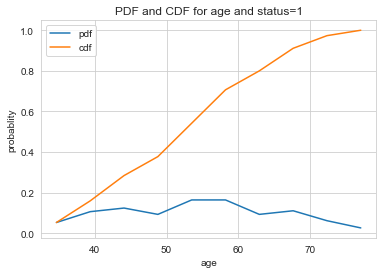

In [ ]:
hman_1=hman.loc[hman["status"]==1]
hman_2=hman.loc[hman["status"]==2]
counts,bin_edges=np.histogram(hman_1["age"],bins=10)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.legend()
plt.title("PDF and CDF for age and status=1")
plt.xlabel("age")
plt.ylabel("probablity")
plt.show()

people with age less than 66 years have 90% survival rate

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


<function matplotlib.pyplot.show(close=None, block=None)>

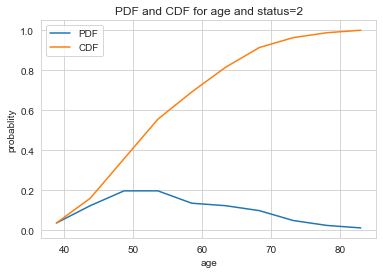

In [ ]:
counts,bin_edges=np.histogram(hman_2["age"],bins=10)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF');
plt.plot(bin_edges[1:],cdf,label='CDF');
plt.legend()
plt.title("PDF and CDF for age and status=2")
plt.xlabel("age")
plt.ylabel("probablity")
plt.show

here we can say that people age between 70 and 80 have less than 10% survival rate


[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


<function matplotlib.pyplot.show(close=None, block=None)>

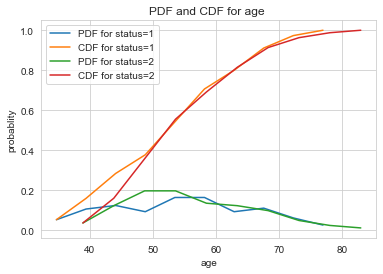

In [ ]:
hman_1=hman.loc[hman["status"]==1]
hman_2=hman.loc[hman["status"]==2]
counts,bin_edges=np.histogram(hman_1["age"],bins=10)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF for status=1');
plt.plot(bin_edges[1:],cdf,label='CDF for status=1');


#for status=2
counts,bin_edges=np.histogram(hman_2["age"],bins=10)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF for status=2');
plt.plot(bin_edges[1:],cdf,label='CDF for status=2');
plt.xlabel('age')
plt.ylabel('probablity')
plt.legend()
plt.title('PDF and CDF for age ')
plt.show

nothing can be determined as both the plots are highly overlapped

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


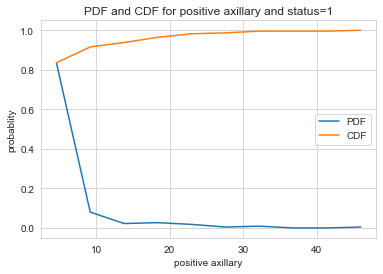

In [ ]:
counts,bin_edges=np.histogram(hman_1["positive axillary"],bins=10)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF');
plt.plot(bin_edges[1:],cdf,label='CDF');
plt.legend()
plt.xlabel('positive axillary')
plt.ylabel('probablity')
plt.title('PDF and CDF for positive axillary and status=1')
plt.show()

people with positive axillary less than equal to 2 have 80% chances of survival and people with positive axillary more than 20 have 3% survival rate

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


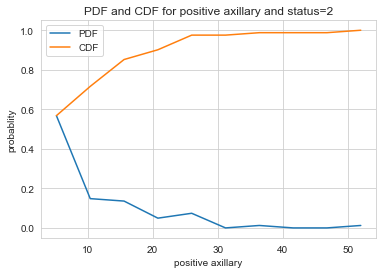

In [ ]:
counts,bin_edges=np.histogram(hman_2["positive axillary"],bins=10)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF');
plt.plot(bin_edges[1:],cdf,label='CDF');
plt.legend()
plt.xlabel('positive axillary')
plt.ylabel('probablity')
plt.title('PDF and CDF for positive axillary and status=2')
plt.show()

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


<function matplotlib.pyplot.show(close=None, block=None)>

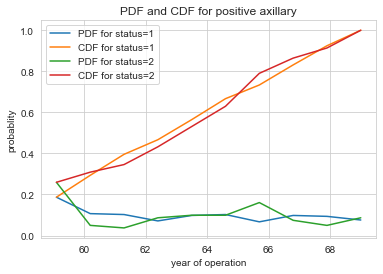

In [ ]:
counts,bin_edges=np.histogram(hman_1["year of operation"],bins=10)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF for status=1');
plt.plot(bin_edges[1:],cdf,label='CDF for status=1');


#for status=2
counts,bin_edges=np.histogram(hman_2["year of operation"],bins=10)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF for status=2');
plt.plot(bin_edges[1:],cdf,label='CDF for status=2');
plt.legend()
plt.xlabel('year of operation')
plt.ylabel('probablity')
plt.title('PDF and CDF for positive axillary')
plt.show

it  is hard to conclude anything here asboth the plots look identical

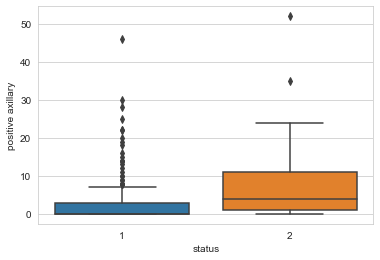

In [ ]:
sns.boxplot(x='status',y='positive axillary', data=hman)
plt.show()

from above box plot it can be seen that about 75% people survived have positive axillary less trhan equal to 3. Also 50% of people who died have positive axillary greater than 5. So above plot is quite helpful


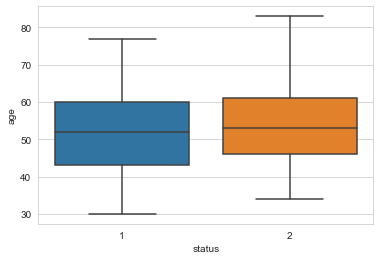

In [ ]:
sns.boxplot(x='status',y='age', data=hman)
plt.show()

here its hard to determine anything because both the boxes are at same levels and have almost equal median

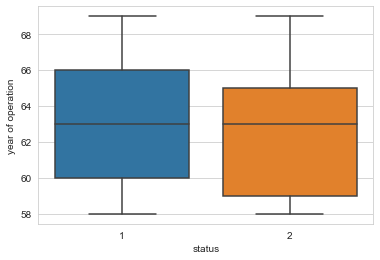

In [ ]:
sns.boxplot(x='status',y='year of operation', data=hman)
plt.show()

this plot is also not very useful

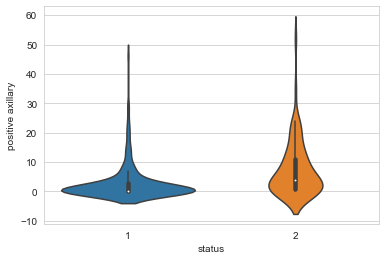

In [ ]:
sns.violinplot(x="status", y="positive axillary", data=hman, size=8)
plt.show()

looks like 50% of the people survived have positive axillary equal to 0

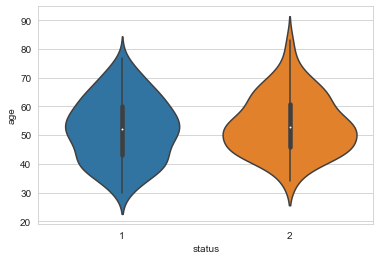

In [ ]:
sns.violinplot(x="status", y="age", data=hman, size=8)
plt.show()

no insights can be drawn as almost equal interquartile range

In [ ]:
RESULTS:
    1.PEOPLE WITH AGE LESS THAN OR EQUAL TO 34 HAVE 100% SURVIVAL RATE
    2.PEOPLE HAVING 0 POSITIVE ARTILLARY HAVE ALMOST 90% SURVIVAL RATE
    3.PEOPLE WITH AGE LESS THAN 40 YEARS HAVE ABOUT 80% SURVIVAL RATE
    4.PEOPLE WITH POSITIVE AXILLARY MORE THAN 17 HAVE ABOUT 15% SURVIVAL RATE
    5.DATA GIVEN ABOUT YEAR OF OPERATION IS OF NO USE AS WE COULD NOT DERIVE ANYTHING OUT OF IT.


In [ ]:
CONCLUSION:
1. As above plots do not give clear picture about all the relation that we checked, we cannot predict the result.
2. As this field is highly sensitive, we have to be very very sure before conclusing anything.
3. Still we have some helpful outcomes with which we can get a little picture about our study.
4. AGE AND NUMBER OF POSITIVE AXILLARY DATA WAS USEFUL ESPECIALLY POSITIVE AXILLARY DATA.
5  TO PREDICT IF THE PERSON CAN SURVIVE WE NEED TO HAVE SOME OTHER DATA.
